In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
# load processed dataset
data = np.load("../data/tree_processed_data.npz", allow_pickle=True)
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]
feature_names = data["feature_names"]

In [3]:
X_train

array([[12.        ,  1.        ,  1.        , ...,  8.        ,
         2.1076888 ,  0.        ],
       [13.        ,  0.        ,  0.        , ...,  8.        ,
         3.68887945,  2.        ],
       [13.        ,  0.        ,  0.        , ...,  3.        ,
         3.9676942 ,  2.        ],
       ...,
       [12.        ,  1.        ,  0.        , ...,  8.        ,
         2.71524426,  2.        ],
       [ 9.        ,  0.        ,  0.        , ...,  1.        ,
         4.79579055,  2.        ],
       [12.        ,  1.        ,  0.        , ...,  3.        ,
         4.36038795,  2.        ]], shape=(696, 7))

In [4]:
# train the model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
# predicting the test set
y_pred = classifier.predict(X_test)
print(y_pred, y_pred.shape, y_pred.dtype)


[0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0.] (174,) float64


In [6]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))

[[0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 

In [7]:
# predicting for one sample
one_sample = X_test[0]
y_hat_1 =classifier.predict([one_sample])[0]
print(y_hat_1)

0.0


In [8]:
# measure model performance
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Confusion Matrix: {cm}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"f1_score: {f1:.3f}")

Confusion Matrix: [[81 19]
 [26 48]]
Accuracy: 0.741
Precision: 0.716
Recall: 0.649
f1_score: 0.681


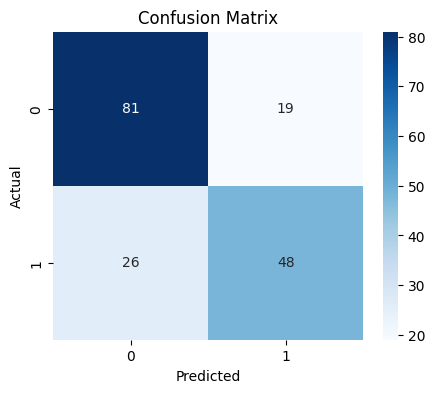

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

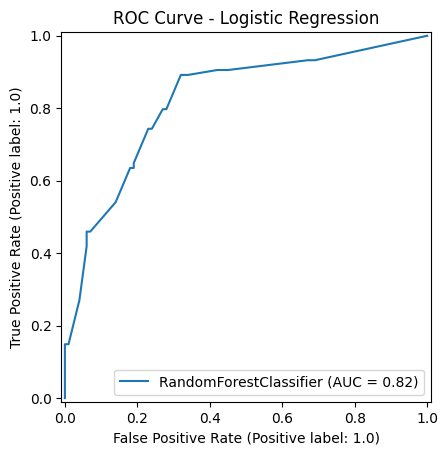

In [10]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

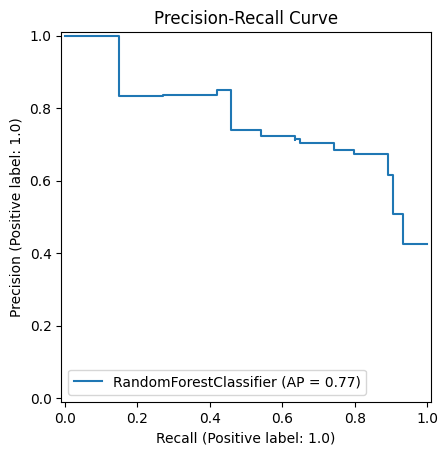

In [11]:
PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()
